# Recap on Storage, ROW vs COLUMN

<img src="img/1.png"/>

<img src="img/2.png"/>

# So what is parquet?

<img src="img/3.png"/>

<img src="img/4.png"/>

<img src="img/5.png"/>

# Great, so about that lab...

## How do I get into dumbo again?
<img src="img/6.png" width="400"/>

## Open terminal/bash/powershell... etc
```sh
ssh your_netid@gw.hpc.nyu.edu
ssh dumbo.hpc.nyu.edu
```

## Onto the lab... what. How do I clone the repo? NotLikeThis

1. Go to the [NYU-Big-Data](https://github.com/nyu-big-data) Git repo...
2. Click on the Lab4-Storage link.
3. Click the GREEN button named "Clone" to get your repo link:
<img src="img/7.png"/>
4. Go back to your dumbo window...
5. clone the repo:
```sh
git clone your_copied_repo_link
```

## Part 1: Benchmarking queries

If you can't write a query by now just quit the course. 
Seriously... save me the time and google the compute cycles.

```sh
+----------+---------+-------+-------+                                          
|first_name|last_name| income|zipcode|
+----------+---------+-------+-------+
|   Annette|   Abbott|72870.0|  14763|
|    Hailey|   Abbott|72182.0|  75097|
|   Jocelyn|   Abbott|56574.0|   3062|
|     Sheri|   Abbott|64952.0|  77663|
|     Sonya|   Abbott|86156.0|  79072|
+----------+---------+-------+-------+
```

<div class="alert alert-danger" role="alert">
  <strong>(Problem 1a)</strong> You need to write these queries:
</div>

1. csv_avg_income: the `average income` grouped by `zipcode`
2. csv_max_income: the `maximum income` grouped by `last_name`
3. csv_anna: people with `first_name` of 'Anna' and `income` at least 70000

### I can write SQL... but where do I put it?

<div class="alert alert-success" role="alert">
  <strong>(Hint)</strong> Open queries.py
</div>

In [7]:
# I'm pseudo code example similar to what is found in queries.py
#
# --- ADD YOUR NEW QUERIES BELOW ---
def fake_query(spark, file_path):
    ## the query_name starts with CSV
    df = spark.read.csv(file_path, header=True, 
               schema='first_name STRING, last_name STRING, income FLOAT, zipcode INT')
    ## the query_name starts with PQ
    df = spark.read.parquet(file_path)
    df.createOrReplaceTempView('people')
    
    query = "I'm the SQL query you meant to write, hear me roar!"
    fake_query = spark.sql(query)
    return fake_query

<div class="alert alert-warning" role="alert">
  Notice that, when reading a csv we need to either specify or infer a schema. This is because csv's are only semi-structured data. Just like relational DBs, parquet files are structured data - so spark is told expressly what to expect for each column when you read a parquet file.
</div>

### Awesome! But they want me to run 25 queries and save the output and stuff... 

I see you don't want to do any work. I've added a [csv_table helper function](https://github.com/sroy2/parquet_optimization/blob/master/bench.py#L94-L159) to my bench.py you can use.


### Great, I copied the code - how do I call it?

Aha! This is a good question!
1. On dumbo go into the lab4 folder you cloned.
2. load the following modules to tell dumbo what python and spark versions/environments we want to use:
<div class="alert alert-success" role="alert">
  <strong>(Hint)</strong> This is important if you want the right version of pyspark! I got lazy of typing them so I put them into my .bashrc (a config file that runs every time you log in).
</div>

```sh
module load python/gnu/3.6.5
module load spark/2.4.0
pyspark
```

Now wait for pyspark to finish loading.

<div class="alert alert-warning" role="alert">
    You may wonder what all of those <strong>WARN Utils</strong> messages are about. The port messages are letting you know that the driver-node (dumbo in this case) can't bind or assign that port (<a href="https://spark.apache.org/docs/latest/monitoring.html">starting at 4040</a>) for communication with the cluster manager. This is probably because someone else is running a spark instance that already has it bound.<br>
</div>

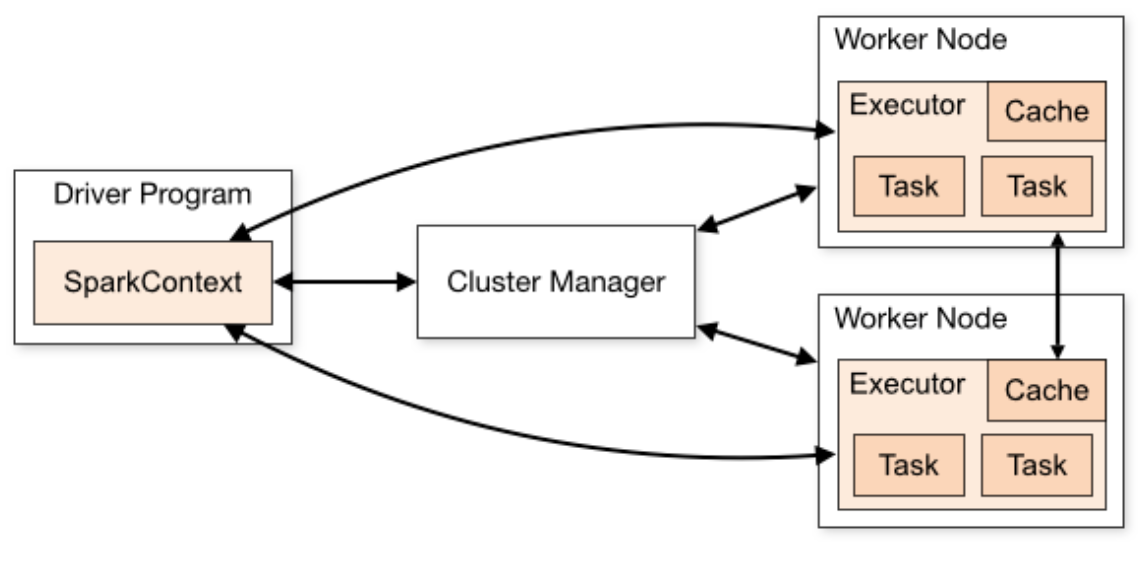

<div class="alert alert-warning" role="alert">
    If you get <strong>WARN HiveConf</strong> (server misconfiguration) or <strong>WARN Client</strong> (you might be missing a declartion in your ~/.bashrc)... Well it probably doesn't matter. Ask on the <a href="https://groups.google.com/a/nyu.edu/forum/#!forum/ds-ga-1004-SP20-d65b">Google Group</a> if your code doesn't run because of it. But... those warnings <strong>probably aren't</strong> why your code breaks.
</div>

```sh
-bash-4.1$ more ~/.bashrc 
HADOOP_EXE='/usr/bin/hadoop'
HADOOP_LIBPATH='/opt/cloudera/parcels/CDH/lib'
HADOOP_STREAMING='hadoop-mapreduce/hadoop-streaming.jar'

alias hfs="$HADOOP_EXE fs"
alias hjs="$HADOOP_EXE jar $HADOOP_LIBPATH/$HADOOP_STREAMING"

module load python/gnu/3.6.5
module load spark/2.4.0
-bash-4.1$ pyspark
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.4.0
      /_/

Using Python version 3.6.5 (default, May  3 2018 09:34:46)
SparkSession available as 'spark'.
```

### Great I'm in - now what?

I'm just going to assume you wrote the queries above already. <br>

Time to import our modules so we can call them from our spark session and read in the data!

<div class="alert alert-success" role="alert">
  <strong>(Hint)</strong> Don't forget to import modules now that you're in pyspark!
</div>

In [17]:
%%script false --no-raise-error

import queries
import bench

queries.csv_anna(spark, 'hdfs:/user/bm106/pub/people_small.csv')
_.show()

bench.benchmark(spark, 25, queries.csv_anna, 'hdfs:/user/bm106/pub/people_small.csv')

```python
>>> _.show()
+----------+---------+-------+                                                  
|first_name|last_name| income|
+----------+---------+-------+
|      Anna|   Bailey|72458.0|
|      Anna| Mcknight|74660.0|
|      Anna|  Ferrell|74849.0|
|      Anna|Velasquez|74693.0|
+----------+---------+-------+

>>> bench.benchmark(spark, 25, q.csv_anna, 'hdfs:/user/bm106/pub/people_small.csv')
[0.0844266414642334, 0.08226633071899414, 0.08829736709594727, 0.0897524356842041, 0.07845854759216309, 0.07774877548217773, 0.07760429382324219, 0.0960390567779541, 0.0782325267791748, 0.07440423965454102, 0.07535243034362793, 0.08235287666320801, 0.07107186317443848, 0.07475018501281738, 0.07666397094726562, 0.07802414894104004, 0.07164120674133301, 0.07479310035705566, 0.0723581314086914, 0.08651256561279297, 0.07664608955383301, 0.07851982116699219, 0.07354259490966797, 0.07335448265075684, 0.08263015747070312]
```

<div class="alert alert-warning" role="alert">
    Woaaah, what is that black-magic underscore thingy you did? In python an underscore is a placeholder variable that stores the output of the last statement you executed. In this case it's holding an unexecuted dataframe object. I execute that object by calling an action, in this case .show(), which triggers the spark operation.
</div>

### Awesome so your imported query works!

*You said something about a helper function?*

1. Ok you bum, I'm assuming you're writing your report in a jupyter notebook.
2. We will use pandas for easy data import and table formatting (so import it!)
3. You pass the entire line we just ran into the helper function as a string:

In [20]:
%%script false --no-raise-error

test = "bench.benchmark(spark, 25, queries.csv_anna, 'hdfs:/user/bm106/pub/people_small.csv')"
bench.csv_table(spark, test)

```python
>>> bench.csv_table(spark, test)
query,file,trials,minimum,median,maximum
csv_anna,people_small,25,0.075,0.092,0.115
```

*Great! But... can't we run it over all the files?*

1. Yes... I anticipated your needs.
2. The helper function can take a third parameter to batch process tasks:

```python
    runtype : string | None, 'single', 'all', 'csv', 'pq'
    
        Optional parameter, if not set only benchmark_cmd results are printed.
        
        'all'    run all pq|csv queries on all file sizes
        'csv'    runs csv queries with all bm106 csv filepath sizes
        'pq'     runs pq queries with all provided pq filepath sizes
        'both'   runs both, csv and pq queries as stated above
```

3. Let's try again, but this time with 'csv':

<div class="alert alert-warning" role="alert">
    <strong>(Warning)</strong> You are getting ready to loop over multiple files and/or queries multiple (hopefully less than 26) times! Jobs can go really slow. The progress bar is your friend. If you can't wait or think something broke, <strong>CTRL+C</strong> should break out. In the mean time get a coffee, watch a video, or take a nap.   : )
</div>


In [ ]:
%%script false --no-raise-error

bench.csv_table(spark, test, 'csv')

```python
>>> bench.csv_table(spark, test, 'csv')
query,file,trials,minimum,median,maximum                                        
csv_anna,people_small,25,0.066,0.075,0.164
csv_anna,people_medium,25,0.562,0.579,0.731
csv_anna,people_large,25,29.017,29.900,32.316
```

*Well look at that - but you didn't output to my jupyter notebook...*

<div class="alert alert-success" role="alert">
  <strong>(Hint)</strong> Just copy it!
</div>

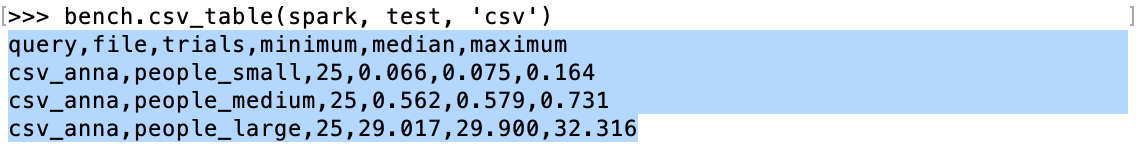

In [27]:
import pandas as pd

df_1 = pd.read_clipboard(sep=",")
df_1

,query,file,trials,minimum,median,maximum
0,csv_anna,people_small,25,0.066,0.075,0.164
1,csv_anna,people_medium,25,0.562,0.579,0.731
2,csv_anna,people_large,25,29.017,29.900,32.316


*Great! But... why didn't you just run all the queries at once?*

1. We could have, read the options for your helper function again.
```python
>>> bench.csv_table(spark, test, 'all csv')
query,file,trials,minimum,median,maximum                                        
csv_avg_income,people_small,25,1.299,1.790,2.282
csv_avg_income,people_medium,25,2.050,2.281,2.892
csv_avg_income,people_large,25,29.432,30.107,32.163
csv_max_income,people_small,25,1.241,1.544,1.884
csv_max_income,people_medium,25,1.871,2.135,5.779
csv_max_income,people_large,25,30.263,37.220,42.168
csv_anna,people_small,25,0.060,0.085,0.218
csv_anna,people_medium,25,0.688,0.740,1.246
csv_anna,people_large,25,34.957,39.114,43.670
```

2. Remember, the more things you chain together the longer it takes to process.

<div class="alert alert-danger" role="alert">
  <strong>(Problem 1b)</strong> You need to record your results:
</div>

In [24]:
%%script false --no-raise-error

bench.csv_table(spark, test, 'all csv')

In [33]:
df_2 = pd.read_clipboard(sep=",")
df_2

,query,file,trials,minimum,median,maximum
0,csv_avg_income,people_small,25,1.299,1.790,2.282
1,csv_avg_income,people_medium,25,2.050,2.281,2.892
2,csv_avg_income,people_large,25,29.432,30.107,32.163
3,csv_max_income,people_small,25,1.241,1.544,1.884
4,csv_max_income,people_medium,25,1.871,2.135,5.779
5,csv_max_income,people_large,25,30.263,37.220,42.168
6,csv_anna,people_small,25,0.060,0.085,0.218
7,csv_anna,people_medium,25,0.688,0.740,1.246
8,csv_anna,people_large,25,34.957,39.114,43.670


## Part 2: CSV vs Parquet

There are two steps here. First copy some files. Second copy and paste your SQL queries.

### How do I copy files?

Ok, this isn't quite as trivial as it sounds. We are actually converting the csv files from before into parquet files. This is going from semi-structured data to structured data. The easiest way is using pyspark (and the [copy helper function](https://github.com/sroy2/parquet_optimization/blob/master/bench.py#L77-L92) in bench.py).

```python
bench.copy(spark)
```

Yep, it's that easy. So is copying your queries - that just takes more pasting.

<div class="alert alert-warning" role="alert">
    <strong>(Warning)</strong> Don't forget to change the spark.read.<strong>csv</strong> to spark.read.<strong>parquet</strong>
</div>

<div class="alert alert-success" role="alert">
  <strong>(Hint)</strong> Don't forget your parquet files, we need them to move forward!
</div>

In [30]:
%%script false --no-raise-error

bench.copy(spark)

##### Rinse and repeat.

<div class="alert alert-danger" role="alert">
  <strong>(Problem 2)</strong> Record the parquet results and compare to the csv results:
</div>

```python
>>> test = "bench.benchmark(spark, 25, queries.pq_anna, 'hdfs:/user/"+bench.whoami()+"/people_small.parquet')"
>>> bench.csv_table(spark, test, 'all pq')
query,file,trials,minimum,median,maximum                                        
pq_avg_income,people_small,25,1.925,2.578,3.366
pq_avg_income,people_medium,25,2.392,3.216,5.029
pq_avg_income,people_large,25,1.983,2.395,3.569
pq_max_income,people_small,25,1.969,2.374,3.312
pq_max_income,people_medium,25,2.018,2.505,3.676
pq_max_income,people_large,25,1.993,2.604,3.960
pq_anna,people_small,25,0.076,0.081,0.197
pq_anna,people_medium,25,0.137,0.153,0.197
pq_anna,people_large,25,0.084,0.089,0.124
```

<div class="alert alert-warning" role="alert">
    <strong>(Warning)</strong> You could also run something like 'all both' if you want the both csv and pq results in one table. Keep in mind searching "large" csv files takes <strong>significantly more time</strong> than searching "large" pq files.
</div>

In [39]:
%%script false --no-raise-error

test = "bench.benchmark(spark, 25, queries.pq_anna, 'hdfs:/user/"+bench.whoami()+"/people_small.parquet')"
bench.csv_table(spark, test, 'all pq')

In [40]:
df_3 = pd.read_clipboard(sep=",")
df_3

,query,file,trials,minimum,median,maximum
0,pq_avg_income,people_small,25,1.925,2.578,3.366
1,pq_avg_income,people_medium,25,2.392,3.216,5.029
2,pq_avg_income,people_large,25,1.983,2.395,3.569
3,pq_max_income,people_small,25,1.969,2.374,3.312
4,pq_max_income,people_medium,25,2.018,2.505,3.676
5,pq_max_income,people_large,25,1.993,2.604,3.960
6,pq_anna,people_small,25,0.076,0.081,0.197
7,pq_anna,people_medium,25,0.137,0.153,0.197
8,pq_anna,people_large,25,0.084,0.089,0.124


## Part 3: Optimizing Parquet

Ok. The part you were waiting for!

<div class="alert alert-danger" role="alert">
  <strong>(Problem 3)</strong> Try at least three different ways of optimizing parquet files and search for the best configurations. Record the optimized results and compare to the base results above.
</div>

1. This is not a comprehensive parquet optimization guide... just enough to think about how to get through this homework.
2. If you don't care about learning the stuff... just look for the green blocks.
3. You still need to do a write up at the end!

<div class="alert alert-warning" role="alert">
    <strong>(Warning)</strong> You aren't allowed to change any of the query code that you wrote in the previous step. So don't try it!
</div>

So how do we speed queries up?

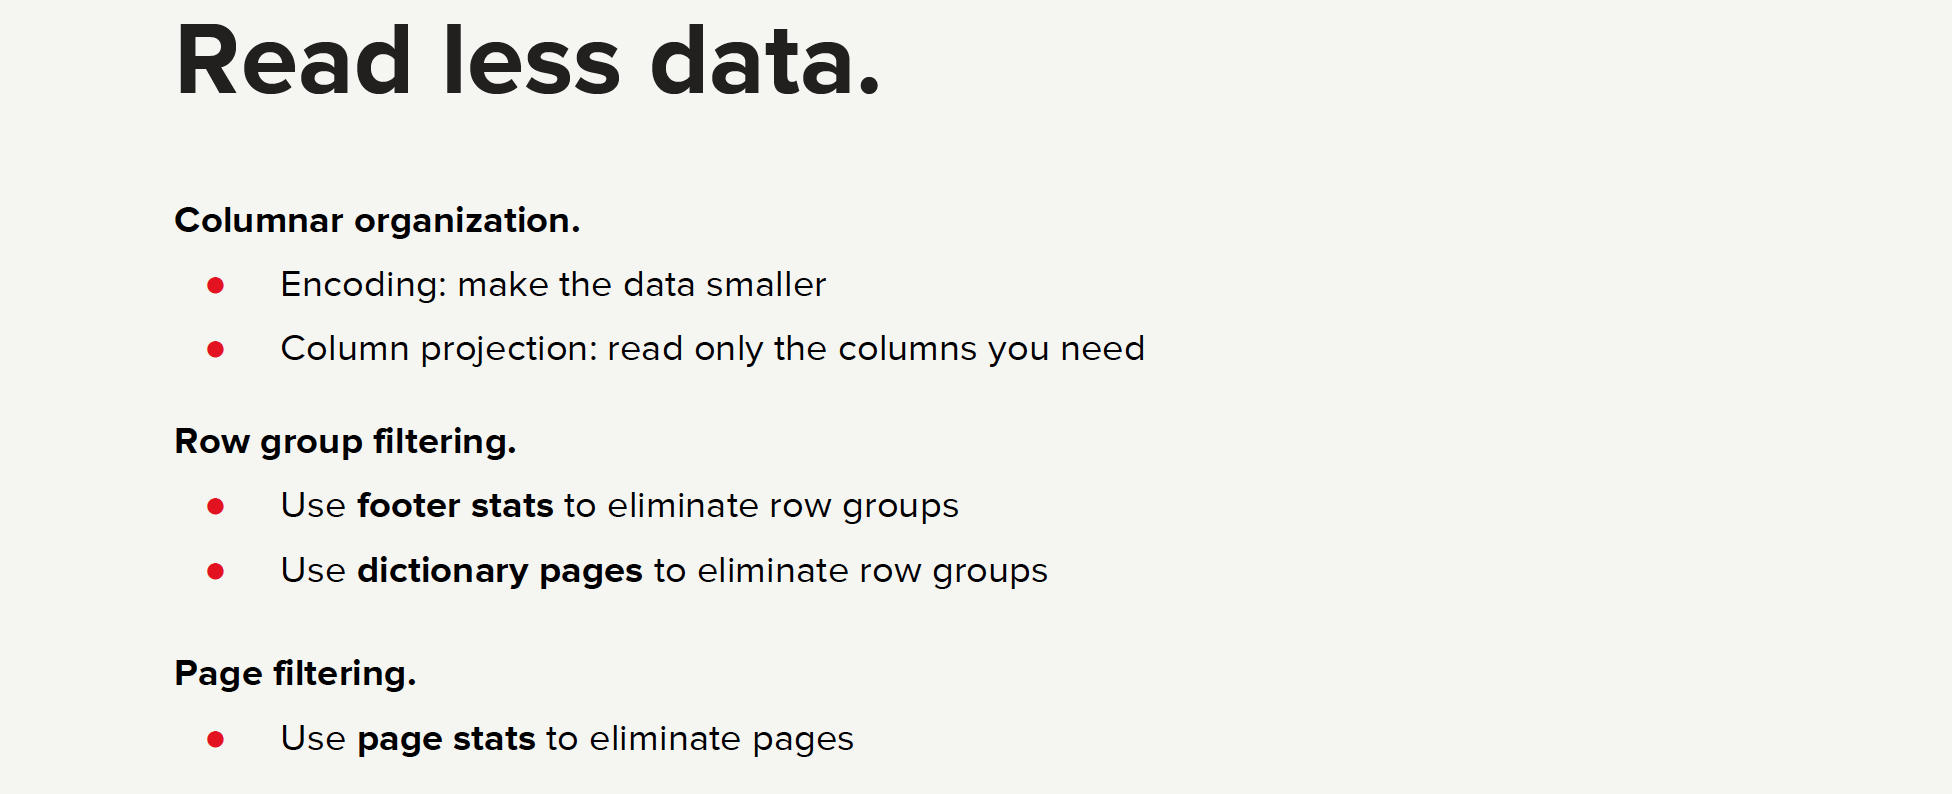

## Sorting

Sorting is useful because it helps organize your columns before they get broken up into row groups. The footer information at the bottom of each page gives basic statistics (like min or max values) that can eliminate entire pages from being read. 

```python
df = spark.read.parquet(...)

#Sort Examples:
df.sort('zipcode')
df.sort('zipcode', 'income')
```

But wait you ask - if it's still in one big parquet file, how does that make it any faster? Well... by itself, it might not.

*But what do I sort?*

<div class="alert alert-warning" role="alert">
    You should probably have an idea of what to sort just by reading your query. When it isn't obvious you can call the .explain() on your dataframe. Note - the physical plan from .explain() is read from the bottom up.
</div>

```python
>>> file = "hdfs:/user/"+bench.whoami()+"/people_small.parquet"
>>> queries.pq_anna(spark, file).explain()
== Physical Plan ==
*(1) Project [first_name#8537, last_name#8538, income#8539]
+- *(1) Filter (((isnotnull(first_name#8537) && isnotnull(income#8539)) && (first_name#8537 = Anna)) && (income#8539 >= 70000.0))
   +- *(1) FileScan parquet [first_name#8537,last_name#8538,income#8539] Batched: true, Format: Parquet, Location: InMemoryFileIndex[hdfs://dumbo/user/sr5388/people_small.parquet], PartitionFilters: [], PushedFilters: [IsNotNull(first_name), IsNotNull(income), EqualTo(first_name,Anna), GreaterThanOrEqual(income,70..., ReadSchema: struct<first_name:string,last_name:string,income:float>
```

<div class="alert alert-success" role="alert">
  <strong>(Hint)</strong> Here we see three different columns being used in FileScan. To optimize most effectively, we therefore want to sort all three columns. This helps maximize the number of row groups we can skip! Additionally, sorted data usually compresses much better, thus taking less space/time to read. <strong>(Warning)</strong> Sorting has an up-front cost that and may not be useful in all applications. In some cases it may result in excess partitions/tiny files, negatively impacting read times.
</div>

*But... you implemented something for us to just automate everything right?*

1. Haha! Not this... I mean... FINE.
2. There are really just two steps: choosing transformations and writing parquet files
3. The transform helper function in bench.py is your friend, transformations are applied **IN THE ORDER** they appear in the list! This can make a difference.

```python
#From bench.transform(spark, t_list, name, benchmark_cmd=None, runtype=False)
    t_list : list of tuples
        list of transformations to apply:
        ('filename','sort','value')
        ('filename','repartition','value')
        
        where filenames = 'people_small'|0, 'people_medium'|1, 'people_large'|2
        
    name : string
        string appended to base filename when adding to hdfs
        'people_small' -> 'people_small'+'_'+name
```


<div class="alert alert-success" role="alert">
  <strong>(Hint)</strong> I recommend the following workflow:
</div>

1. Start with ONE query.
2. Decide what you want to tweak for that query.
3. Build the transformation list, you can address different files with different strategies.
4. Run the transform.
5. Benchmark the new parquet files.

```python
>>> t_list = [('people_small', 'sort', 'zipcode'),
              (1, 'sort', 'zipcode'),
              (2, 'sort', 'zipcode, income, first_name')]
>>> test = "bench.benchmark(spark, 25, queries.pq_anna, 'hdfs:/user/"+bench.whoami()+"/people_small_sort.parquet')"
>>> bench.transform(spark, t_list, 'q1_sort')
>>> bench.csv_table(spark, test, 'pq')
query,file,trials,minimum,median,maximum                                        
pq_anna,people_small,25,0.068,0.078,0.195
pq_anna,people_medium,25,1.133,1.412,3.168
pq_anna,people_large,25,1.081,1.607,2.743
```

<div class="alert alert-warning" role="alert">
    You can automatically chain together transform and csv_table by providing the benchmark_cmd to transform directly: <br>
    bench.transform(spark=spark, t_list=t_list, name='q1_sort', benchmark_cmd=test, runtype='pq')
</div>


In [37]:
%%script false --no-raise-error

t_list = [('people_small', 'sort', 'zipcode'),
          (1, 'sort', 'zipcode'),
          (2, 'sort', 'zipcode, income, first_name')]
test = "bench.benchmark(spark, 25, queries.pq_anna, 'hdfs:/user/"+bench.whoami()+"/people_small_q1_sort.parquet')"

bench.transform(spark, t_list, 'q1_sort')
bench.csv_table(spark, test, 'pq')

#bench.transform(spark, t_list, 'q1_sort', test, 'pq')


## Partitioning

### Method 1 - (slow)

Explicitly setting the partition columns when writing out to parquet is a slower, but arguably more robust method of partitioning. I didn't include this as a method you can call in transform... call me lazy. This will make an individual file for every unique value in the column you partitionBy. Recall having many small files is often poor for optimization. To test it out, try something akin to the following:

```python
>>> file = 'hdfs:/user/'+bench.whoami()+'/'+x
>>> df = spark.read.parquet(file+'.parquet')
>>> df.write.partitionBy("zipcode").parquet(file+'_partition.parquet')
```


### Method 2 - (fast)

We are just going to do the same thing we did with sorting above.

## 

In [ ]:
# Method 1 - THIS IS SLOW!!!
for x in ['people_small', 'people_medium', 'people_large']:
    file = 'hdfs:/user/'+bench.whoami()+'/'+x
    df = spark.read.parquet(file+'.parquet')
    df.write.partitionBy("zipcode").parquet(file+'_partition.parquet')
    
# Method 2
